<a href="https://colab.research.google.com/github/HolmesZ/Pytorch-Tutorial-Codymy/blob/main/05_Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a simple neural network to classify iris flowers

<img
    style="display: block;
           margin-left: auto;
           margin-right: auto;
           width: 30%;"
    src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/800px-Colored_neural_network.svg.png"
    alt="A Simple Artificial Neural Network" width="200">
</img>

# Create a Basic Neural Network Model

In [174]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [175]:
# Create a Model class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer 1 (number of neurons) -->
  # Hidden Layer 2 (number of neurons) -->
  # Output Layer (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


# Load Data

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [178]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [179]:
# Change last column to number
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

<ipython-input-179-52c062e06ffb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


In [180]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [181]:
# Train test split
X = my_df.drop('species', axis=1) # 删除DataFrame的某一列，axis=1表示按列删除，axios=0表示按行删除
y = my_df['species']
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [182]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [185]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [186]:
# Conver y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Train Neural Network

In [187]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [188]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose optimizer Adam, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [189]:
for param in model.parameters():
  print(param, param.size())

Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True) torch.Size([8, 4])
Parameter containing:
tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626],
       requires_grad=True) torch.Size([8])
Parameter containing:
tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -0.0259,  0.2337,  0

In [190]:
# Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1221736669540405
Epoch: 10 and loss: 1.0063387155532837
Epoch: 20 and loss: 0.8100401759147644
Epoch: 30 and loss: 0.5941768884658813
Epoch: 40 and loss: 0.41819247603416443
Epoch: 50 and loss: 0.28753551840782166
Epoch: 60 and loss: 0.2000935673713684
Epoch: 70 and loss: 0.14164799451828003
Epoch: 80 and loss: 0.10641483962535858
Epoch: 90 and loss: 0.08683954924345016


Text(0.5, 0, 'Epoch')

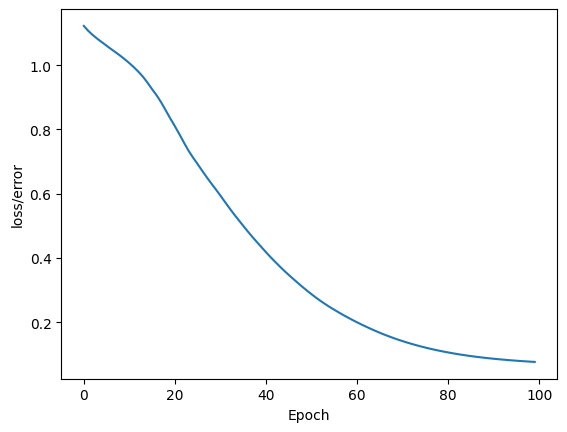

In [191]:
# Graph it our!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')


# Evaluate Test Data Set On Network

In [192]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test)  # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test)

print(loss)

tensor(0.0676)


In [193]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item() == y_test[i]}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

1.) tensor([ 5.6636, -3.0392, -3.3812]) 	 0 	 True
2.) tensor([-1.3827,  3.4787,  0.1803]) 	 1 	 True
3.) tensor([-3.8528,  5.9262,  1.5562]) 	 1 	 True
4.) tensor([ 4.9996, -2.4509, -3.0789]) 	 0 	 True
5.) tensor([-7.2495,  5.7823,  7.7485]) 	 2 	 True
6.) tensor([-4.4786,  5.5286,  3.1198]) 	 1 	 True
7.) tensor([-6.7623,  5.2668,  7.4304]) 	 2 	 True
8.) tensor([ 3.9329, -1.4996, -2.5964]) 	 0 	 True
9.) tensor([ 4.1092, -1.7072, -2.6504]) 	 0 	 True
10.) tensor([-7.5574,  4.8330,  9.3358]) 	 2 	 True
11.) tensor([-3.6980,  5.0758,  2.2436]) 	 1 	 True
12.) tensor([ 4.4126, -1.9137, -2.8204]) 	 0 	 True
13.) tensor([-7.5653,  4.8753,  9.3068]) 	 2 	 True
14.) tensor([-4.0388,  5.7952,  2.0396]) 	 1 	 True
15.) tensor([-4.3615,  5.2242,  3.2498]) 	 1 	 True
16.) tensor([ 4.4590, -2.0531, -2.7912]) 	 0 	 True
17.) tensor([-3.2743,  5.3003,  1.2351]) 	 1 	 True
18.) tensor([-4.3145,  4.8814,  3.5566]) 	 1 	 True
19.) tensor([ 4.2278, -1.7400, -2.7413]) 	 0 	 True
20.) tensor([ 4.7777,

# Evaluate NEW Data On The Network

In [194]:
# Assume there already a data point
new_iris = torch.tensor([5.1,3.5, 1.4, 0.2])

with torch.no_grad():
  print(model(new_iris))

tensor([ 4.8104, -2.3172, -2.9755])


# Save and Load our Neural Network Model

In [195]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt') # save weights and bias and sth.


In [196]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<ipython-input-196-f4376919f48a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [197]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)